Current working directory: C:\Users\lapworld.lk\Desktop\Year 2\Courseworks\CM2604\Coursework
✅ Directory ready: reports/eda_plots/
Dataset Shape: (7043, 21)

First 5 rows:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


DATASET INFORMATION

Column Names and Data Types:
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Missing Values:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
C

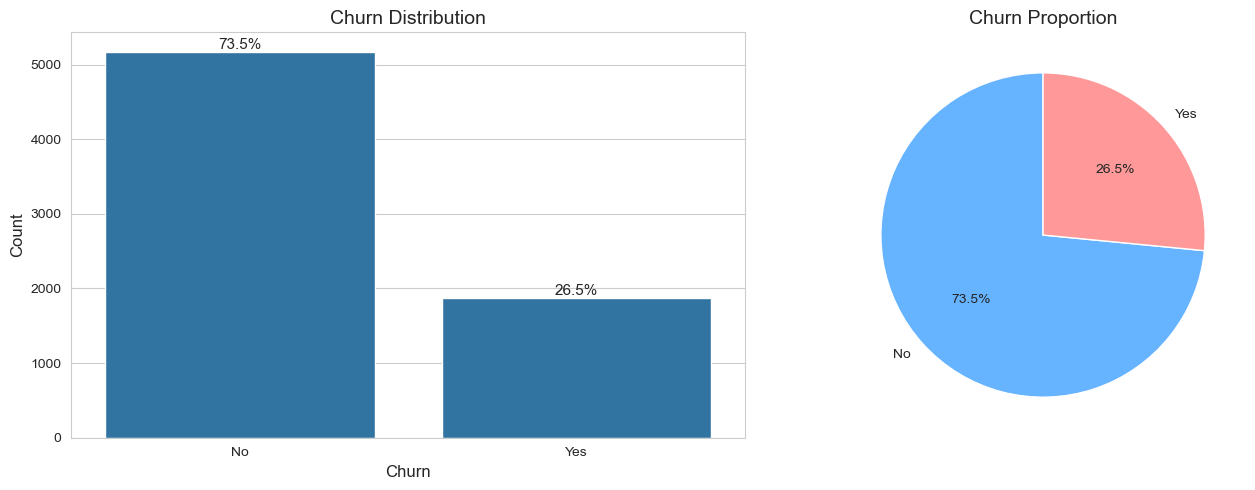


Churn Rate: 26.5%
Class Imbalance Ratio: 2.8:1
NUMERICAL FEATURES ANALYSIS

Converting TotalCharges to numeric...
   Found 11 missing values
   Filled with median: 1397.47
✅ Saved: reports/eda_plots/numerical_features.png


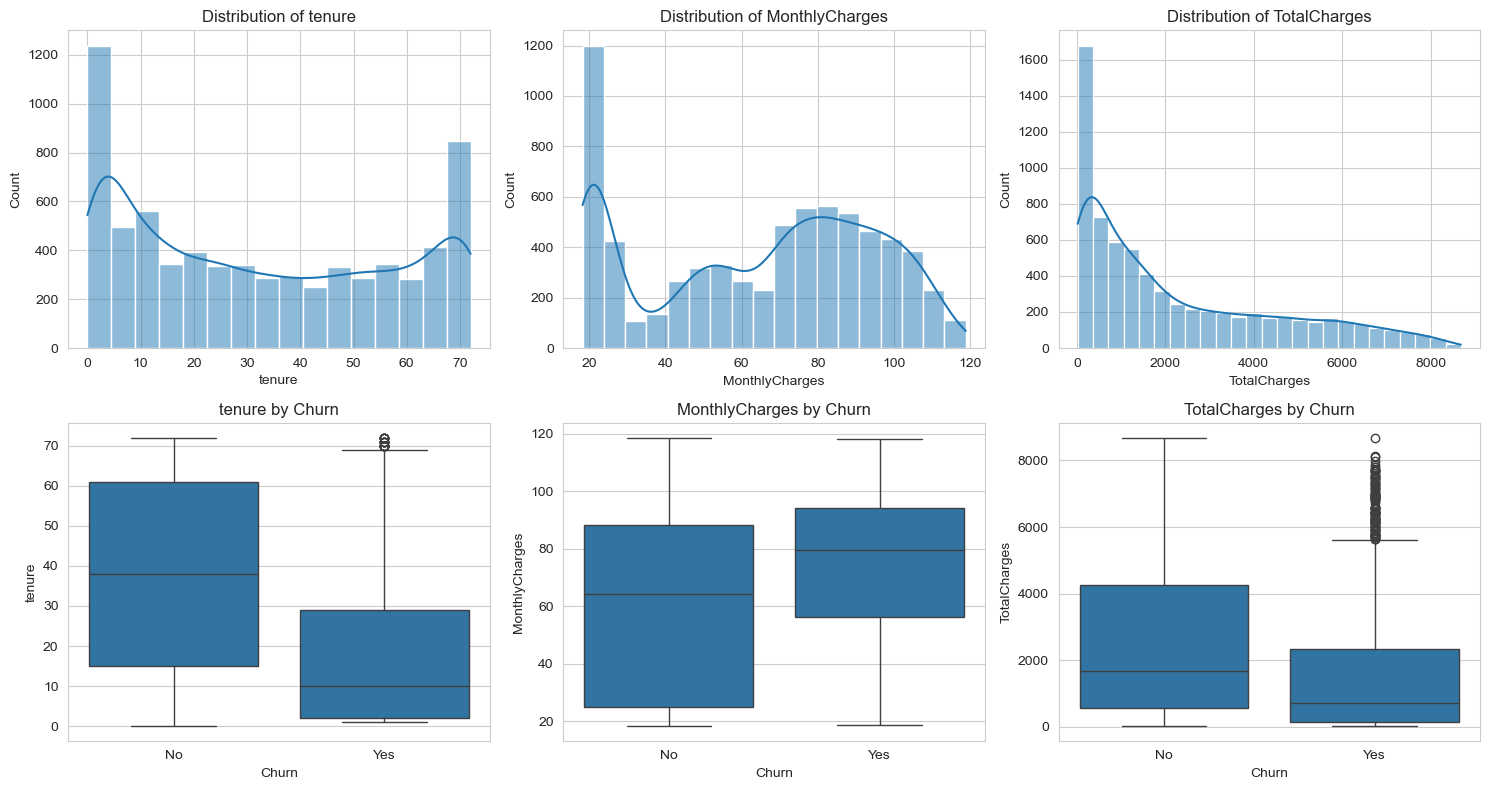

CATEGORICAL FEATURES ANALYSIS


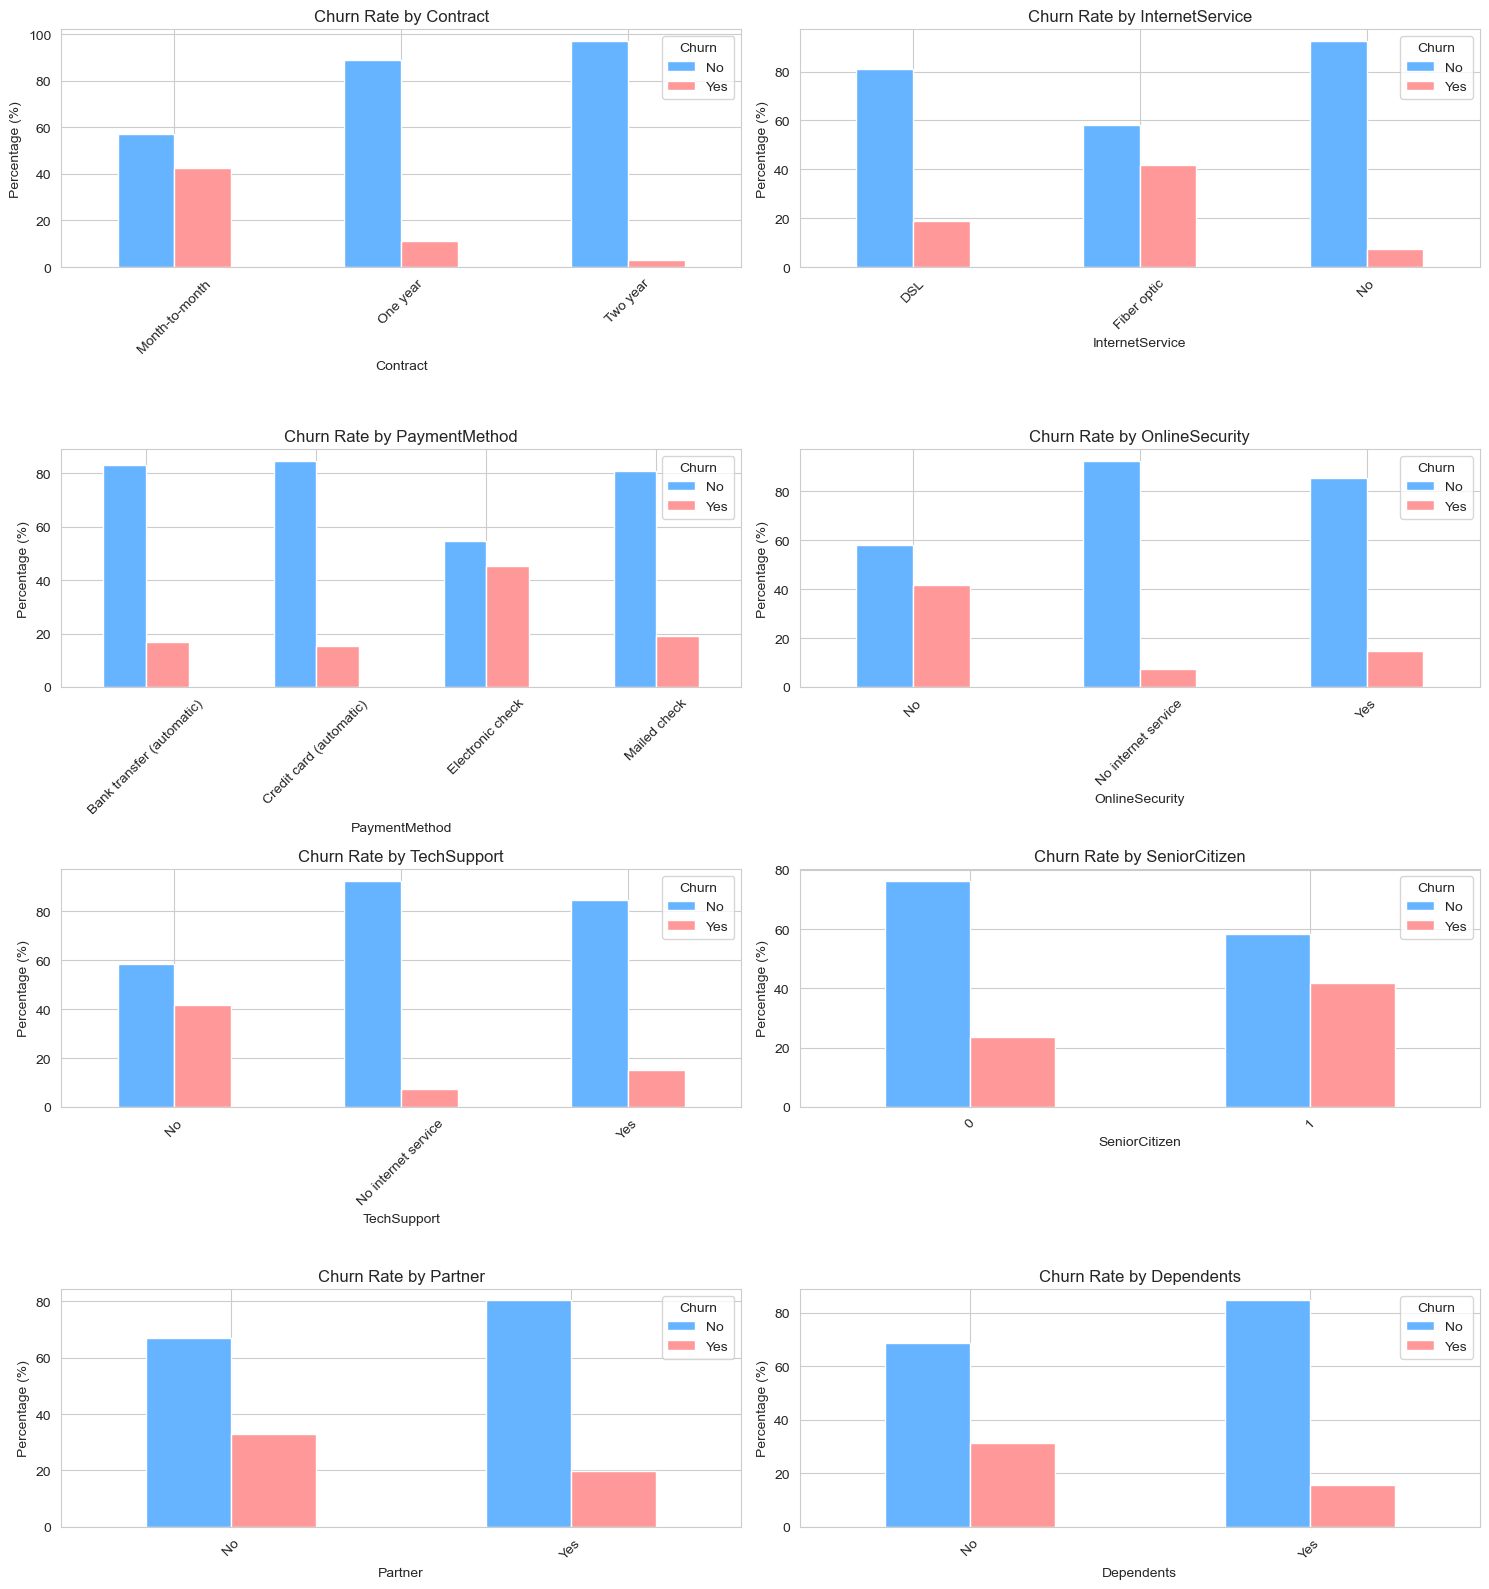


Top Features Correlated with Churn:
gender            NaN
SeniorCitizen     NaN
Partner           NaN
Dependents        NaN
tenure            NaN
PhoneService      NaN
MultipleLines     NaN
InternetService   NaN
OnlineSecurity    NaN
OnlineBackup      NaN
Name: Churn, dtype: float64
KEY INSIGHTS FROM EDA

1. DATA OVERVIEW:
   - Total samples: 7,043 customers
   - 21 features including customerID and target (Churn)
   - 3 numerical features: tenure, MonthlyCharges, TotalCharges
   - 18 categorical features including demographic and service attributes

2. TARGET DISTRIBUTION:
   - Class imbalance present: 73.5% No Churn vs 26.5% Churn
   - Churn rate: 26.5% (1,869 customers)
   - Imbalance ratio: 2.8:1 (Non-churners : Churners)

3. KEY FINDINGS:
   - Customers with month-to-month contracts have highest churn rate (~43%)
   - Fiber optic internet users have higher churn rate (~42%)
   - Electronic check payment method associated with higher churn (~45%)
   - Customers without online secu

In [16]:
# ============================================================================
# TASK 1: EXPLORATORY DATA ANALYSIS (EDA)
# ============================================================================

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

print("Current working directory:", os.getcwd())

# Create directory for saving plots
os.makedirs('reports/eda_plots', exist_ok=True)
print("✅ Directory ready: reports/eda_plots/")

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# 1. DATA LOADING
# CORRECT PATH: data/ (from Coursework folder)
df = pd.read_csv('data/WA_Fn-UseC_-Telco-Customer-Churn.csv')
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
display(df.head())

# 2. DATA BASIC INFO
print("=" * 50)
print("DATASET INFORMATION")
print("=" * 50)

print("\nColumn Names and Data Types:")
print(df.dtypes)

print("\nMissing Values:")
print(df.isnull().sum())

print("\nBasic Statistics:")
print(df.describe())

# 3. TARGET VARIABLE ANALYSIS
print("=" * 50)
print("TARGET VARIABLE: CHURN")
print("=" * 50)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
sns.countplot(data=df, x='Churn', ax=axes[0])
axes[0].set_title('Churn Distribution', fontsize=14)
axes[0].set_xlabel('Churn', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)

# Add percentage labels
total = len(df)
for p in axes[0].patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    axes[0].annotate(percentage, (x, y), ha='center', va='bottom', fontsize=11)

# Pie chart
churn_counts = df['Churn'].value_counts()
axes[1].pie(churn_counts.values, labels=churn_counts.index, autopct='%1.1f%%',
            colors=['#66b3ff', '#ff9999'], startangle=90)
axes[1].set_title('Churn Proportion', fontsize=14)

plt.tight_layout()

# CORRECT SAVE PATH: reports/eda_plots/
plt.savefig('reports/eda_plots/churn_distribution.png', dpi=300, bbox_inches='tight')
print("✅ Saved: reports/eda_plots/churn_distribution.png")

plt.show()

print(f"\nChurn Rate: {churn_counts['Yes'] / total * 100:.1f}%")
print(f"Class Imbalance Ratio: {churn_counts['No'] / churn_counts['Yes']:.1f}:1")

# 4. NUMERICAL FEATURES ANALYSIS
print("=" * 50)
print("NUMERICAL FEATURES ANALYSIS")
print("=" * 50)

# Fix TotalCharges column first
print("\nConverting TotalCharges to numeric...")
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
nan_count = df['TotalCharges'].isnull().sum()
print(f"   Found {nan_count} missing values")

# Fill missing values with median
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)
print(f"   Filled with median: {df['TotalCharges'].median():.2f}")

numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    # Distribution plot
    sns.histplot(data=df, x=col, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}', fontsize=12)
    axes[i].set_xlabel(col, fontsize=10)

    # Box plot by churn
    sns.boxplot(data=df, x='Churn', y=col, ax=axes[i + 3])
    axes[i + 3].set_title(f'{col} by Churn', fontsize=12)
    axes[i + 3].set_xlabel('Churn', fontsize=10)
    axes[i + 3].set_ylabel(col, fontsize=10)

plt.tight_layout()

# CORRECT SAVE PATH
plt.savefig('reports/eda_plots/numerical_features.png', dpi=300, bbox_inches='tight')
print("✅ Saved: reports/eda_plots/numerical_features.png")

plt.show()

# 5. CATEGORICAL FEATURES ANALYSIS
print("=" * 50)
print("CATEGORICAL FEATURES ANALYSIS")
print("=" * 50)

categorical_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
                    'PhoneService', 'MultipleLines', 'InternetService',
                    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                    'TechSupport', 'StreamingTV', 'StreamingMovies',
                    'Contract', 'PaperlessBilling', 'PaymentMethod']

# Select top 8 categorical features for visualization
top_categorical = ['Contract', 'InternetService', 'PaymentMethod', 'OnlineSecurity',
                   'TechSupport', 'SeniorCitizen', 'Partner', 'Dependents']

fig, axes = plt.subplots(4, 2, figsize=(15, 16))
axes = axes.flatten()

for i, col in enumerate(top_categorical):
    # Create crosstab
    ct = pd.crosstab(df[col], df['Churn'], normalize='index') * 100

    # Plot
    ct.plot(kind='bar', ax=axes[i], color=['#66b3ff', '#ff9999'])
    axes[i].set_title(f'Churn Rate by {col}', fontsize=12)
    axes[i].set_xlabel(col, fontsize=10)
    axes[i].set_ylabel('Percentage (%)', fontsize=10)
    axes[i].legend(title='Churn', loc='upper right')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('reports/eda_plots/categorical_features.png', dpi=300, bbox_inches='tight')
plt.show()

# 6. CORRELATION ANALYSIS
# print("=" * 50)
# print("CORRELATION ANALYSIS")
# print("=" * 50)
#
# # Convert categorical to numerical for correlation
# df_corr = df.copy()
# for col in df_corr.select_dtypes(include=['object']).columns:
#     if col != 'customerID':
#         df_corr[col] = df_corr[col].astype('category').cat.codes
#
# # Convert Churn to numeric
# df_corr['Churn'] = df_corr['Churn'].map({'Yes': 1, 'No': 0})
#
# plt.figure(figsize=(12, 8))
# correlation_matrix = df_corr.drop('customerID', axis=1).corr()
# sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm',
#             center=0, square=True, linewidths=1)
# plt.title('Feature Correlation Matrix', fontsize=14)
# plt.tight_layout()
# plt.savefig('reports/eda_plots/correlation_matrix.png', dpi=300, bbox_inches='tight')
# plt.show()

# Top correlations with Churn
churn_corr = correlation_matrix['Churn'].sort_values(ascending=False)
print("\nTop Features Correlated with Churn:")
print(churn_corr.head(10))

# 7. KEY INSIGHTS AND OBSERVATIONS
print("=" * 50)
print("KEY INSIGHTS FROM EDA")
print("=" * 50)

insights = """
1. DATA OVERVIEW:
   - Total samples: 7,043 customers
   - 21 features including customerID and target (Churn)
   - 3 numerical features: tenure, MonthlyCharges, TotalCharges
   - 18 categorical features including demographic and service attributes

2. TARGET DISTRIBUTION:
   - Class imbalance present: 73.5% No Churn vs 26.5% Churn
   - Churn rate: 26.5% (1,869 customers)
   - Imbalance ratio: 2.8:1 (Non-churners : Churners)

3. KEY FINDINGS:
   - Customers with month-to-month contracts have highest churn rate (~43%)
   - Fiber optic internet users have higher churn rate (~42%)
   - Electronic check payment method associated with higher churn (~45%)
   - Customers without online security/tech support more likely to churn
   - Longer tenure customers less likely to churn
   - Higher monthly charges correlate with higher churn rate

4. DATA QUALITY:
   - No missing values except in TotalCharges (11 missing)
   - All data types appropriate
   - CustomerID can be removed as it's an identifier

5. RECOMMENDATIONS FOR MODELING:
   - Address class imbalance using techniques like SMOTE
   - Encode categorical variables appropriately
   - Consider contract type, internet service, and payment method as key predictors
   - Scale numerical features for certain algorithms
"""

print(insights)

**Decision Tree Model**


In [18]:
from imblearn.combine import SMOTEENN
import pandas as pd
import numpy as np
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings

warnings.filterwarnings('ignore')

df = pd.read_csv('data/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.shape
print("Converting TotalCharges to numeric...")
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
nan_count = df['TotalCharges'].isnull().sum()
print(f"   Found {nan_count} missing values")
# Fill missing values with median
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)
print(f"   Filled with median: {df['TotalCharges'].median():.2f}")
df = df.drop('customerID', axis=1)
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
print("   Encoded target: Yes→1, No→0")
X = df.drop('Churn', axis=1)
y = df['Churn']
# Convert categorical variables to numeric codes (simple approach)
for col in X.select_dtypes(include=['object']).columns:
    X[col] = X[col].astype('category').cat.codes

print(f"Features shape: {X.shape}")
print(f"Target distribution: {y.value_counts().to_dict()}")
# SPLIT ONCE AND KEEP IT CONSISTENT
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")
print(f"Features: {X_train.shape[1]}")
print(f"Original training distribution: {y_train.value_counts().to_dict()}")
print(f"Original test distribution: {y_test.value_counts().to_dict()}")

# ============ BASELINE MODELS ============
print("\n" + "=" * 50)
print("BASELINE DECISION TREE")
print("=" * 50)

# Baseline fixed model
model_dt = DecisionTreeClassifier(criterion='gini', random_state=100, max_depth=6, min_samples_leaf=8)
model_dt.fit(X_train, y_train)
y_pred_baseline = model_dt.predict(X_test)

print(f"Baseline Accuracy: {accuracy_score(y_test, y_pred_baseline):.4f}")
print(f"Baseline Model Score: {model_dt.score(X_test, y_test):.4f}")

# ============ BASELINE WITH HYPERPARAMETER TUNING ============
print("\n" + "=" * 50)
print("BASELINE MODEL - HYPERPARAMETER TUNING")
print("=" * 50)

from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_leaf': [1, 2, 4, 6, 8, 10],
    'min_samples_split': [2, 5, 10]
}

# Create and fit tuned model
baseline_tuned = GridSearchCV(
    DecisionTreeClassifier(random_state=100),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

baseline_tuned.fit(X_train, y_train)
y_pred_baseline_tuned = baseline_tuned.predict(X_test)

print(f"Best Parameters: {baseline_tuned.best_params_}")
print(f"Tuned Accuracy: {accuracy_score(y_test, y_pred_baseline_tuned):.4f}")
# ============ SMOTEENN MODELS WITH PIPELINE ============
print("\n" + "=" * 50)
print("SMOTEENN MODELS (WITH PIPELINE)")
print("=" * 50)

from imblearn.pipeline import Pipeline

# Create pipeline
smote_pipeline = Pipeline([
    ('smoteenn', SMOTEENN(random_state=42)),
    ('classifier', DecisionTreeClassifier(
        criterion='gini',
        random_state=100,
        max_depth=6,
        min_samples_leaf=8
    ))
])

# Train with ONE line (pipeline handles SMOTEENN internally)
smote_pipeline.fit(X_train, y_train)

# Predict with ONE line
y_pred_smote = smote_pipeline.predict(X_test)

print(f"Test Accuracy: {accuracy_score(y_test, y_pred_smote):.4f}")

# Bonus: You can still see what SMOTEENN did
print(f"\nPipeline steps: {[step[0] for step in smote_pipeline.steps]}")
# ============ SMOTEENN TUNED MODEL WITH PIPELINE ============
print("\n--- SMOTEENN Tuned Model (WITH PIPELINE - CORRECT) ---")

from imblearn.pipeline import Pipeline

# Create pipeline first
smote_tuning_pipeline = Pipeline([
    ('smoteenn', SMOTEENN(random_state=42)),
    ('classifier', DecisionTreeClassifier(random_state=100))
])

# Parameter grid for ENTIRE pipeline
param_grid_smote = {
    'smoteenn__sampling_strategy': [0.5, 0.75, 1.0],  # Control SMOTEENN balance
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__max_depth': [4, 6, 8, 10, 12],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4, 8],
    'classifier__max_features': ['auto', 'sqrt', 'log2']
}

# GridSearchCV with pipeline
smote_tuned = GridSearchCV(
    smote_tuning_pipeline,  # Use pipeline instead of just model
    param_grid_smote,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=0
)

# Fit on ORIGINAL X_train, y_train (not resampled!)
smote_tuned.fit(X_train, y_train)

print(f"Best Parameters: {smote_tuned.best_params_}")
print(f"Best CV Score: {smote_tuned.best_score_:.4f}")

# Predict with best pipeline
y_pred_smote_tuned = smote_tuned.predict(X_test)
print(f"Test Accuracy: {accuracy_score(y_test, y_pred_smote_tuned):.4f}")

# Predict on the ORIGINAL test set
y_pred_smote_tuned = smote_tuned.predict(X_test)

print(f"Best Parameters: {smote_tuned.best_params_}")
print(f"Best CV Score: {smote_tuned.best_score_:.4f}")
print(f"Test Accuracy: {accuracy_score(y_test, y_pred_smote_tuned):.4f}")

# ============ FINAL COMPARISON ============
print("\n" + "=" * 70)
print("FINAL COMPARISON OF ALL MODELS (ALL EVALUATED ON ORIGINAL TEST SET)")
print("=" * 70)

# Prepare results
results = []

# Baseline fixed
acc1 = accuracy_score(y_test, y_pred_baseline)
prec1 = metrics.precision_score(y_test, y_pred_baseline, pos_label=1, zero_division=0)
rec1 = metrics.recall_score(y_test, y_pred_baseline, pos_label=1, zero_division=0)
f1_1 = metrics.f1_score(y_test, y_pred_baseline, pos_label=1, zero_division=0)
results.append(("Baseline (Fixed)", acc1, prec1, rec1, f1_1))

# Baseline tuned
acc2 = accuracy_score(y_test, y_pred_baseline_tuned)
prec2 = metrics.precision_score(y_test, y_pred_baseline_tuned, pos_label=1, zero_division=0)
rec2 = metrics.recall_score(y_test, y_pred_baseline_tuned, pos_label=1, zero_division=0)
f1_2 = metrics.f1_score(y_test, y_pred_baseline_tuned, pos_label=1, zero_division=0)
results.append(("Baseline (Tuned)", acc2, prec2, rec2, f1_2))

# SMOTEENN fixed
acc3 = accuracy_score(y_test, y_pred_smote)
prec3 = metrics.precision_score(y_test, y_pred_smote, pos_label=1, zero_division=0)
rec3 = metrics.recall_score(y_test, y_pred_smote, pos_label=1, zero_division=0)
f1_3 = metrics.f1_score(y_test, y_pred_smote, pos_label=1, zero_division=0)
results.append(("SMOTEENN (Fixed)", acc3, prec3, rec3, f1_3))

# SMOTEENN tuned
acc4 = accuracy_score(y_test, y_pred_smote_tuned)
prec4 = metrics.precision_score(y_test, y_pred_smote_tuned, pos_label=1, zero_division=0)
rec4 = metrics.recall_score(y_test, y_pred_smote_tuned, pos_label=1, zero_division=0)
f1_4 = metrics.f1_score(y_test, y_pred_smote_tuned, pos_label=1, zero_division=0)
results.append(("SMOTEENN (Tuned)", acc4, prec4, rec4, f1_4))

# Display results
print(f"\n{'Model':<25} {'Accuracy':<10} {'Precision':<10} {'Recall':<10} {'F1-Score':<10}")
print("-" * 65)

for name, acc, prec, rec, f1 in results:
    print(f"{name:<25} {acc:<10.4f} {prec:<10.4f} {rec:<10.4f} {f1:<10.4f}")

# Find best model
best_acc = max([acc for _, acc, _, _, _ in results])
best_models = [name for name, acc, _, _, _ in results if acc == best_acc]

print(f"\n{'=' * 70}")
print(f"BEST MODEL(S) BY ACCURACY: {', '.join(best_models)} (Accuracy: {best_acc:.4f})")

# Additional: Find best by F1-score (often better for imbalanced data)
best_f1 = max([f1 for _, _, _, _, f1 in results])
best_f1_models = [name for name, _, _, _, f1 in results if f1 == best_f1]
print(f"BEST MODEL(S) BY F1-SCORE: {', '.join(best_f1_models)} (F1: {best_f1:.4f})")

# ============ DETAILED REPORTS ============
print("\n" + "=" * 70)
print("DETAILED CLASSIFICATION REPORTS")
print("=" * 70)

reports = [
    ("Baseline (Fixed)", y_test, y_pred_baseline),
    ("Baseline (Tuned)", y_test, y_pred_baseline_tuned),
    ("SMOTEENN (Fixed)", y_test, y_pred_smote),
    ("SMOTEENN (Tuned)", y_test, y_pred_smote_tuned)
]

for name, y_true, y_pred in reports:
    print(f"\n{name}:")
    print(classification_report(y_true, y_pred, labels=[0, 1], target_names=['No Churn', 'Churn']))
    print(f"Confusion Matrix:\n{confusion_matrix(y_true, y_pred)}")
    print("-" * 50)

Converting TotalCharges to numeric...
   Found 11 missing values
   Filled with median: 1397.47
   Encoded target: Yes→1, No→0
Features shape: (7043, 19)
Target distribution: {0: 5174, 1: 1869}
Training set: 5634 samples
Test set: 1409 samples
Features: 19
Original training distribution: {0: 4139, 1: 1495}
Original test distribution: {0: 1035, 1: 374}

BASELINE DECISION TREE
Baseline Accuracy: 0.7821
Baseline Model Score: 0.7821

BASELINE MODEL - HYPERPARAMETER TUNING
Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}
Tuned Accuracy: 0.7850

SMOTEENN MODELS (WITH PIPELINE)
Test Accuracy: 0.6977

Pipeline steps: ['smoteenn', 'classifier']

--- SMOTEENN Tuned Model (WITH PIPELINE - CORRECT) ---
Best Parameters: {'classifier__criterion': 'gini', 'classifier__max_depth': 12, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 10, 'smoteenn__sampling_strategy': 0.5}
Best CV Score: 0.7865
T

**Neural Network**



----------------------------------------
DATA PREPARATION
----------------------------------------
Original data shape: (7043, 21)
Churn distribution:
Churn
0    5174
1    1869
Name: count, dtype: int64
Churn rate: 26.54%
Features after encoding: 30

Prepared data shapes:
X_train: (5634, 30)
X_test: (1409, 30)
y_train: (5634,)
y_test: (1409,)

Training set class distribution:
Class 0 (No Churn): 4139 (73.46%)
Class 1 (Churn): 1495 (26.54%)

----------------------------------------
NEURAL NETWORK ARCHITECTURE
----------------------------------------

Model Summary:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,481 (17.50 KB)

 Trainable params: 4,289 (16.75 KB)

 Non-trainable params: 192 (768.00 B)


----------------------------------------
TRAINING NEURAL NETWORK
----------------------------------------
Epoch 1/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.6907 - auc: 0.7341 - loss: 0.6271 - precision: 0.4451 - recall: 0.6558 - val_accuracy: 0.7826 - val_auc: 0.8148 - val_loss: 0.4833 - val_precision: 0.5776 - val_recall: 0.6305 - learning_rate: 0.0010
Epoch 2/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7599 - auc: 0.7798 - loss: 0.5100 - precision: 0.5484 - recall: 0.5575 - val_accuracy: 0.7862 - val_auc: 0.8197 - val_loss: 0.4496 - val_precision: 0.5993 - val_recall: 0.5525 - learning_rate: 0.0010
Epoch 3/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7744 - auc: 0.7976 - loss: 0.4750 - precision: 0.5887 - recall: 0.5058 - val_accuracy: 0.7933 - val_auc: 0.8181 - val_loss: 0.4456 - val_precision: 0.6165 - val_recall: 0.5559 - learning_rate: 0.0010
Epoch 4/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7919 - auc: 0.8203 - los

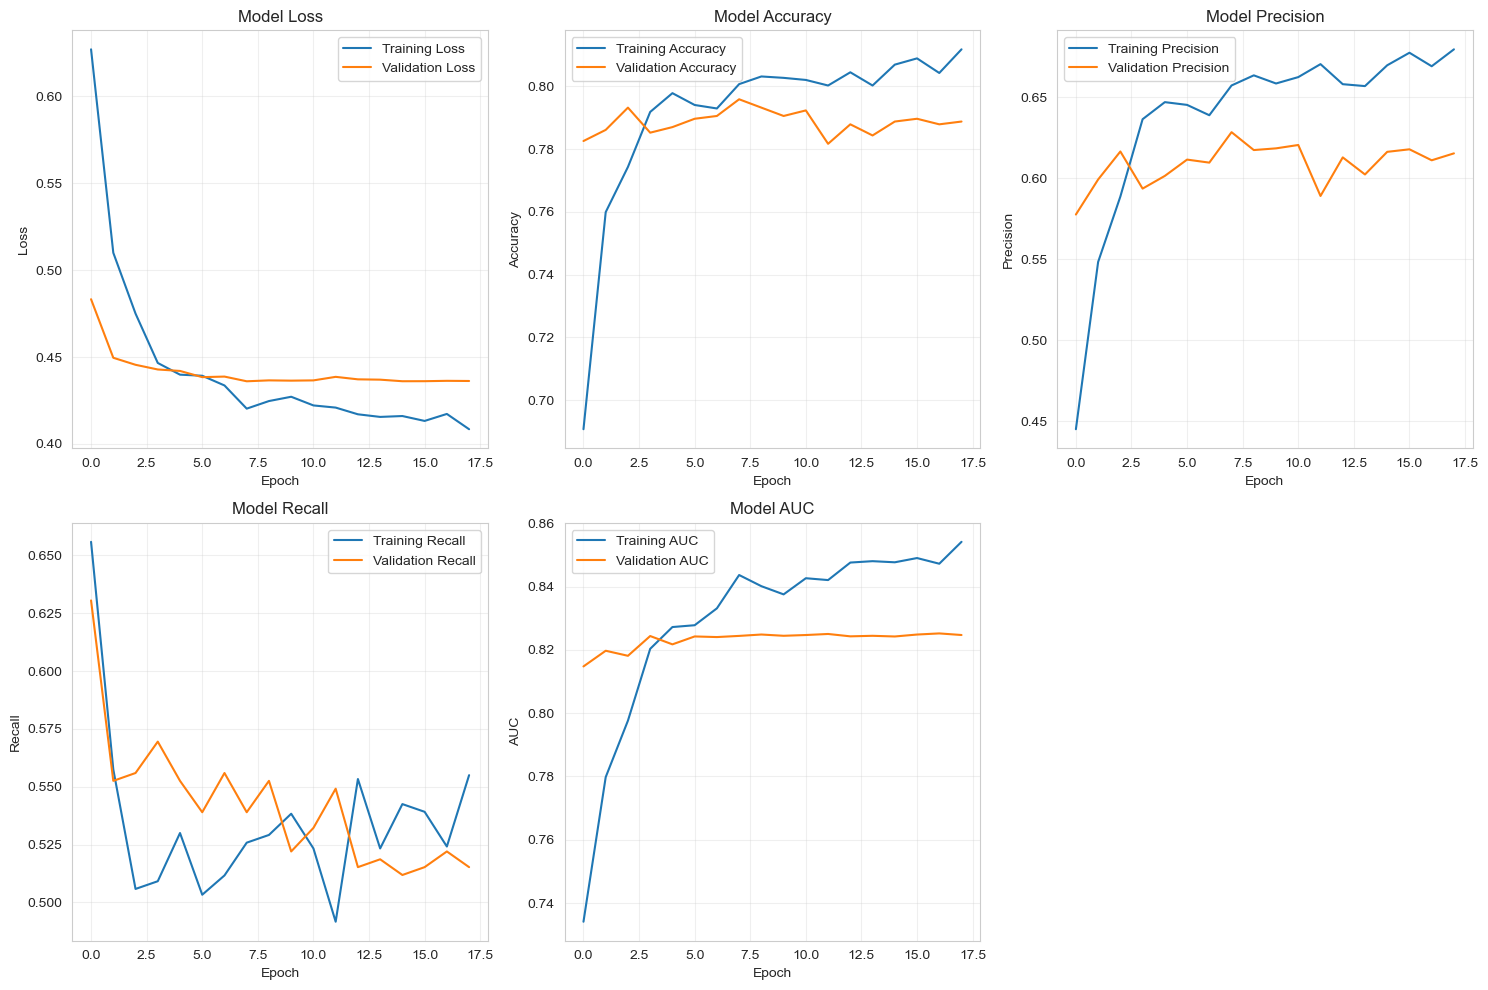

✅ Training history saved to: reports/neural_network_training_history.png

NEURAL NETWORK WITH CLASS WEIGHTS
Class weights: {0: np.float64(0.6805991785455424), 1: np.float64(1.8842809364548494)}
  Class 0 (No Churn) weight: 0.68
  Class 1 (Churn) weight: 1.88
Training completed in 10 epochs
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step

Weighted Neural Network Results:
  Accuracy:  0.6984
  Precision: 0.4607
  Recall:    0.7995
  F1-Score:  0.5846
  AUC:       0.8163

Classification Report (Weighted Model):
              precision    recall  f1-score   support

    No Churn       0.90      0.66      0.76      1035
       Churn       0.46      0.80      0.58       374

    accuracy                           0.70      1409
   macro avg       0.68      0.73      0.67      1409
weighted avg       0.78      0.70      0.72      1409


COMPARISON: BASELINE vs WEIGHTED NEURAL NETWORK

Model Comparison:
                    Model  Accuracy  Precision   Recall  F1-Score      AUC
Neural Network (Baseline)

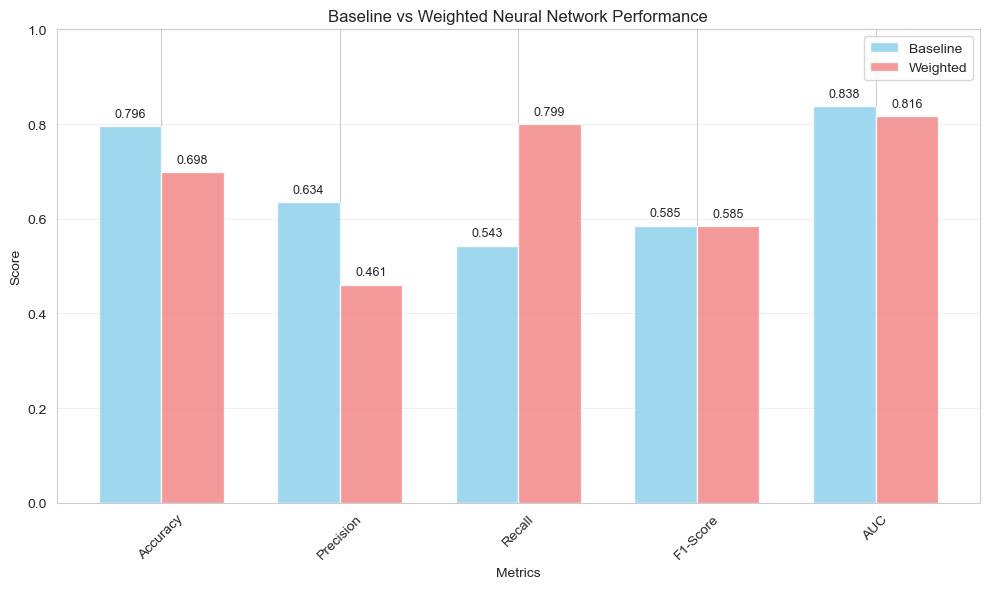

✅ Comparison plot saved to: reports/nn_baseline_vs_weighted.png

----------------------------------------
ROC CURVE COMPARISON
----------------------------------------


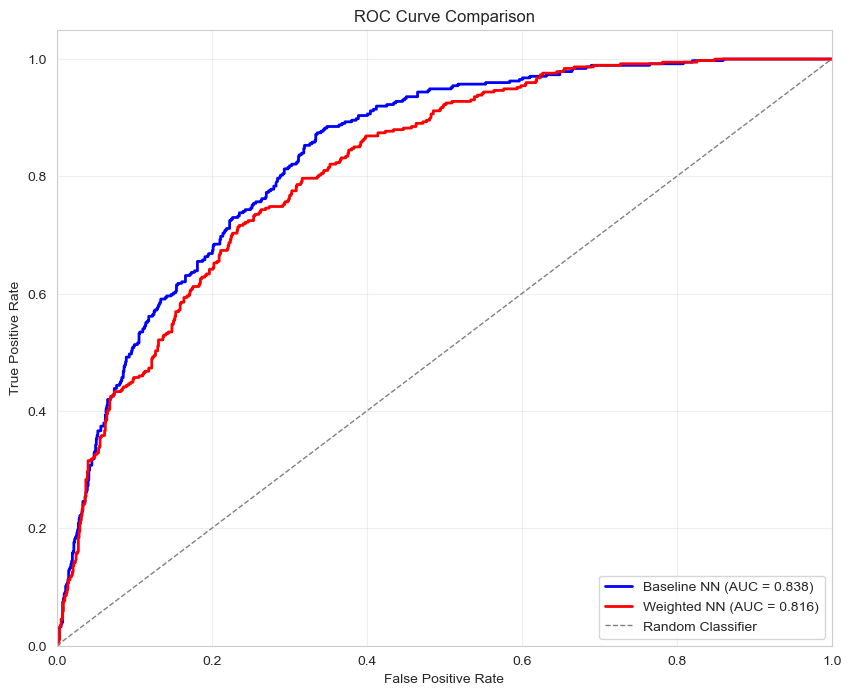

✅ ROC curve saved to: reports/roc_curve_comparison.png

SAVING MODELS
✅ Predictions saved to: reports/nn_predictions.csv
✅ Model comparison saved to: reports/nn_model_comparison.csv

SUMMARY REPORT

Best Performing Neural Network Model:
  Model: Neural Network (Baseline)
  F1-Score: 0.5850
  Accuracy: 0.7956
  Recall: 0.5428
  Precision: 0.6344
  AUC: 0.8381

NEURAL NETWORK IMPLEMENTATION COMPLETE!


In [20]:

import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (classification_report, confusion_matrix,
                             accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, roc_curve, auc)
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
import warnings
import os

warnings.filterwarnings('ignore')
# Use tf.keras directly for better compatibility
keras = tf.keras
layers = tf.keras.layers

# DATA PREPARATION FOR NEURAL NETWORK
print("\n" + "-" * 40)
print("DATA PREPARATION")
print("-" * 40)

# Load data
df = pd.read_csv('data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Data cleaning
print(f"Original data shape: {df.shape}")

# Convert TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

# Drop ID column
df = df.drop('customerID', axis=1)

# Encode target variable
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
print(f"Churn distribution:\n{df['Churn'].value_counts()}")
print(f"Churn rate: {(df['Churn'].sum() / len(df) * 100):.2f}%")

# ----------------------------
# ONE-HOT ENCODE CATEGORICALS
# ----------------------------
df_encoded = pd.get_dummies(df, drop_first=True)

# Split features and target
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

print(f"Features after encoding: {X.shape[1]}")

# ----------------------------
# SCALE NUMERICAL FEATURES
# ----------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print("\nPrepared data shapes:")
print(f"X_train: {X_train_nn.shape}")
print(f"X_test: {X_test_nn.shape}")
print(f"y_train: {y_train_nn.shape}")
print(f"y_test: {y_test_nn.shape}")
print(f"\nTraining set class distribution:")
print(f"Class 0 (No Churn): {(y_train_nn == 0).sum()} ({(y_train_nn == 0).sum() / len(y_train_nn) * 100:.2f}%)")
print(f"Class 1 (Churn): {(y_train_nn == 1).sum()} ({(y_train_nn == 1).sum() / len(y_train_nn) * 100:.2f}%)")

# SIMPLE NEURAL NETWORK ARCHITECTURE
print("\n" + "-" * 40)
print("NEURAL NETWORK ARCHITECTURE")
print("-" * 40)


def create_baseline_nn(input_dim):
    """Create a simple baseline neural network"""
    model = tf.keras.Sequential([
        # Input layer
        tf.keras.layers.Input(shape=(input_dim,)),

        # First hidden layer
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.3),

        # Second hidden layer
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.3),

        # Output layer (binary classification)
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    return model


# Create the model
input_dim = X_train_nn.shape[1]
model_nn = create_baseline_nn(input_dim)

# Compile the model
model_nn.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy',
             tf.keras.metrics.Precision(name='precision'),
             tf.keras.metrics.Recall(name='recall'),
             tf.keras.metrics.AUC(name='auc')]
)

# Display model summary
print("\nModel Summary:")
model_nn.summary()

# TRAINING THE NEURAL NETWORK
print("\n" + "-" * 40)
print("TRAINING NEURAL NETWORK")
print("-" * 40)

# Define callbacks for better training
callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True
    ),
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=5,
        min_lr=1e-6
    )
]

# Train the model
history = model_nn.fit(
    X_train_nn, y_train_nn,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=callbacks,
    verbose=1
)

print(f"\nTraining completed in {len(history.history['loss'])} epochs")

# EVALUATE NEURAL NETWORK
print("\n" + "-" * 40)
print("NEURAL NETWORK EVALUATION")
print("-" * 40)

# Make predictions
y_pred_nn_prob = model_nn.predict(X_test_nn)
y_pred_nn = (y_pred_nn_prob > 0.5).astype(int).flatten()

# Calculate metrics
nn_accuracy = accuracy_score(y_test_nn, y_pred_nn)
nn_precision = precision_score(y_test_nn, y_pred_nn, pos_label=1, zero_division=0)
nn_recall = recall_score(y_test_nn, y_pred_nn, pos_label=1, zero_division=0)
nn_f1 = f1_score(y_test_nn, y_pred_nn, pos_label=1, zero_division=0)
nn_auc = roc_auc_score(y_test_nn, y_pred_nn_prob)

print(f"Neural Network Metrics:")
print(f"  Accuracy:  {nn_accuracy:.4f}")
print(f"  Precision: {nn_precision:.4f}")
print(f"  Recall:    {nn_recall:.4f}")
print(f"  F1-Score:  {nn_f1:.4f}")
print(f"  AUC:       {nn_auc:.4f}")

print("\nClassification Report:")
print(classification_report(y_test_nn, y_pred_nn, target_names=['No Churn', 'Churn'], zero_division=0))

print("Confusion Matrix:")
cm_nn = confusion_matrix(y_test_nn, y_pred_nn)
print(cm_nn)

# VISUALIZE TRAINING HISTORY
print("\n" + "-" * 40)
print("TRAINING HISTORY VISUALIZATION")
print("-" * 40)

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Plot loss
axes[0, 0].plot(history.history['loss'], label='Training Loss')
axes[0, 0].plot(history.history['val_loss'], label='Validation Loss')
axes[0, 0].set_title('Model Loss')
axes[0, 0].set_ylabel('Loss')
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Plot accuracy
axes[0, 1].plot(history.history['accuracy'], label='Training Accuracy')
axes[0, 1].plot(history.history['val_accuracy'], label='Validation Accuracy')
axes[0, 1].set_title('Model Accuracy')
axes[0, 1].set_ylabel('Accuracy')
axes[0, 1].set_xlabel('Epoch')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Plot precision
if 'precision' in history.history:
    axes[0, 2].plot(history.history['precision'], label='Training Precision')
    axes[0, 2].plot(history.history['val_precision'], label='Validation Precision')
    axes[0, 2].set_title('Model Precision')
    axes[0, 2].set_ylabel('Precision')
    axes[0, 2].set_xlabel('Epoch')
    axes[0, 2].legend()
    axes[0, 2].grid(True, alpha=0.3)

# Plot recall
if 'recall' in history.history:
    axes[1, 0].plot(history.history['recall'], label='Training Recall')
    axes[1, 0].plot(history.history['val_recall'], label='Validation Recall')
    axes[1, 0].set_title('Model Recall')
    axes[1, 0].set_ylabel('Recall')
    axes[1, 0].set_xlabel('Epoch')
    axes[1, 0].legend()
    axes[1, 0].grid(True, alpha=0.3)

# Plot AUC
if 'auc' in history.history:
    axes[1, 1].plot(history.history['auc'], label='Training AUC')
    axes[1, 1].plot(history.history['val_auc'], label='Validation AUC')
    axes[1, 1].set_title('Model AUC')
    axes[1, 1].set_ylabel('AUC')
    axes[1, 1].set_xlabel('Epoch')
    axes[1, 1].legend()
    axes[1, 1].grid(True, alpha=0.3)

# Remove empty subplot
axes[1, 2].axis('off')

plt.tight_layout()
plt.savefig('reports/neural_network_training_history.png', dpi=300, bbox_inches='tight')
plt.show()
print("✅ Training history saved to: reports/neural_network_training_history.png")

# NEURAL NETWORK WITH CLASS WEIGHTS (Handling Imbalance)
print("\n" + "=" * 80)
print("NEURAL NETWORK WITH CLASS WEIGHTS")
print("=" * 80)

# Calculate class weights to handle imbalance
class_weights = compute_class_weight(
    'balanced',
    classes=np.unique(y_train_nn),
    y=y_train_nn
)
class_weight_dict = {i: class_weights[i] for i in range(len(class_weights))}

print(f"Class weights: {class_weight_dict}")
print(f"  Class 0 (No Churn) weight: {class_weight_dict[0]:.2f}")
print(f"  Class 1 (Churn) weight: {class_weight_dict[1]:.2f}")

# Create and train model with class weights
model_nn_weighted = create_baseline_nn(input_dim)
model_nn_weighted.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy', 'precision', 'recall', 'auc']
)

history_weighted = model_nn_weighted.fit(
    X_train_nn, y_train_nn,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=callbacks,
    class_weight=class_weight_dict,
    verbose=0
)

print(f"Training completed in {len(history_weighted.history['loss'])} epochs")

# Evaluate weighted model
y_pred_nn_weighted_prob = model_nn_weighted.predict(X_test_nn)
y_pred_nn_weighted = (y_pred_nn_weighted_prob > 0.5).astype(int).flatten()

print(f"\nWeighted Neural Network Results:")
print(f"  Accuracy:  {accuracy_score(y_test_nn, y_pred_nn_weighted):.4f}")
print(f"  Precision: {precision_score(y_test_nn, y_pred_nn_weighted, pos_label=1, zero_division=0):.4f}")
print(f"  Recall:    {recall_score(y_test_nn, y_pred_nn_weighted, pos_label=1, zero_division=0):.4f}")
print(f"  F1-Score:  {f1_score(y_test_nn, y_pred_nn_weighted, pos_label=1, zero_division=0):.4f}")
print(f"  AUC:       {roc_auc_score(y_test_nn, y_pred_nn_weighted_prob):.4f}")

print("\nClassification Report (Weighted Model):")
print(classification_report(y_test_nn, y_pred_nn_weighted, target_names=['No Churn', 'Churn'], zero_division=0))

# VISUALIZE COMPARISON
print("\n" + "=" * 80)
print("COMPARISON: BASELINE vs WEIGHTED NEURAL NETWORK")
print("=" * 80)

# Create comparison table
comparison_data = {
    'Model': ['Neural Network (Baseline)', 'Neural Network (Weighted)'],
    'Accuracy': [nn_accuracy, accuracy_score(y_test_nn, y_pred_nn_weighted)],
    'Precision': [nn_precision, precision_score(y_test_nn, y_pred_nn_weighted, pos_label=1, zero_division=0)],
    'Recall': [nn_recall, recall_score(y_test_nn, y_pred_nn_weighted, pos_label=1, zero_division=0)],
    'F1-Score': [nn_f1, f1_score(y_test_nn, y_pred_nn_weighted, pos_label=1, zero_division=0)],
    'AUC': [nn_auc, roc_auc_score(y_test_nn, y_pred_nn_weighted_prob)]
}

comparison_df = pd.DataFrame(comparison_data)
print("\nModel Comparison:")
print(comparison_df.to_string(index=False))

# Visual comparison
fig, ax = plt.subplots(figsize=(10, 6))
metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC']
x = np.arange(len(metrics_to_plot))
width = 0.35

# Get metric values
baseline_metrics = [comparison_df.loc[0, m] for m in metrics_to_plot]
weighted_metrics = [comparison_df.loc[1, m] for m in metrics_to_plot]

ax.bar(x - width / 2, baseline_metrics, width, label='Baseline', color='skyblue', alpha=0.8)
ax.bar(x + width / 2, weighted_metrics, width, label='Weighted', color='lightcoral', alpha=0.8)

ax.set_xlabel('Metrics')
ax.set_ylabel('Score')
ax.set_title('Baseline vs Weighted Neural Network Performance')
ax.set_xticks(x)
ax.set_xticklabels(metrics_to_plot, rotation=45)
ax.set_ylim([0, 1])
ax.legend()
ax.grid(True, alpha=0.3, axis='y')

# Add value labels
for i, (base_val, weight_val) in enumerate(zip(baseline_metrics, weighted_metrics)):
    ax.text(i - width / 2, base_val + 0.02, f'{base_val:.3f}', ha='center', fontsize=9)
    ax.text(i + width / 2, weight_val + 0.02, f'{weight_val:.3f}', ha='center', fontsize=9)

plt.tight_layout()
plt.savefig('reports/nn_baseline_vs_weighted.png', dpi=300, bbox_inches='tight')
plt.show()
print("✅ Comparison plot saved to: reports/nn_baseline_vs_weighted.png")

# ROC CURVE COMPARISON
print("\n" + "-" * 40)
print("ROC CURVE COMPARISON")
print("-" * 40)

# Calculate ROC curves
fpr_baseline, tpr_baseline, _ = roc_curve(y_test_nn, y_pred_nn_prob)
fpr_weighted, tpr_weighted, _ = roc_curve(y_test_nn, y_pred_nn_weighted_prob)
roc_auc_baseline = auc(fpr_baseline, tpr_baseline)
roc_auc_weighted = auc(fpr_weighted, tpr_weighted)

plt.figure(figsize=(10, 8))
plt.plot(fpr_baseline, tpr_baseline, color='blue', lw=2,
         label=f'Baseline NN (AUC = {roc_auc_baseline:.3f})')
plt.plot(fpr_weighted, tpr_weighted, color='red', lw=2,
         label=f'Weighted NN (AUC = {roc_auc_weighted:.3f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.savefig('reports/roc_curve_comparison.png', dpi=300, bbox_inches='tight')
plt.show()
print("✅ ROC curve saved to: reports/roc_curve_comparison.png")

# SAVE MODELS
print("\n" + "=" * 80)
print("SAVING MODELS")
print("=" * 80)

import joblib

# Create directories if they don't exist
os.makedirs('models', exist_ok=True)
os.makedirs('reports', exist_ok=True)

# # Save neural network models
# model_nn.save('../models/neural_network_baseline.h5')
# print("✅ Baseline Neural Network model saved to: models/neural_network_baseline.h5")
#
# model_nn_weighted.save('../models/neural_network_weighted.h5')
# print("✅ Weighted Neural Network model saved to: models/neural_network_weighted.h5")
#
# # Save scaler
# joblib.dump(scaler, '../models/scaler.pkl')
# print("✅ Scaler saved to: models/scaler.pkl")

# Save predictions and metrics
results_df = pd.DataFrame({
    'y_true': y_test_nn.values,
    'y_pred_baseline': y_pred_nn,
    'y_prob_baseline': y_pred_nn_prob.flatten(),
    'y_pred_weighted': y_pred_nn_weighted,
    'y_prob_weighted': y_pred_nn_weighted_prob.flatten()
})
results_df.to_csv('reports/nn_predictions.csv', index=False)
print("✅ Predictions saved to: reports/nn_predictions.csv")

# Save comparison results
comparison_df.to_csv('reports/nn_model_comparison.csv', index=False)
print("✅ Model comparison saved to: reports/nn_model_comparison.csv")

# SUMMARY REPORT
print("\n" + "=" * 80)
print("SUMMARY REPORT")
print("=" * 80)

print("\nBest Performing Neural Network Model:")
best_idx = comparison_df['F1-Score'].idxmax()
best_model_name = comparison_df.loc[best_idx, 'Model']
print(f"  Model: {best_model_name}")
print(f"  F1-Score: {comparison_df.loc[best_idx, 'F1-Score']:.4f}")
print(f"  Accuracy: {comparison_df.loc[best_idx, 'Accuracy']:.4f}")
print(f"  Recall: {comparison_df.loc[best_idx, 'Recall']:.4f}")
print(f"  Precision: {comparison_df.loc[best_idx, 'Precision']:.4f}")
print(f"  AUC: {comparison_df.loc[best_idx, 'AUC']:.4f}")

print("\n" + "=" * 80)
print("NEURAL NETWORK IMPLEMENTATION COMPLETE!")
print("=" * 80)